In [2]:
import pandas as pd
print(pd.__version__)

1.5.2


In [3]:
import numpy as np
print(np.__version__)

1.23.5


In [4]:
import altair as alt

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [7]:
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [8]:
df = pd.read_csv('/Users/ananyatiwari/Desktop/India Agriculture Crop Production.csv')

In [9]:
df.to_csv('Agricultural production since 1997 in India')

After discussing the other datasets with you during office hours, I realized that I should try to find data from more legitimate sources. Unfortunately, I was unsuccessful in reaching the US Foreign Agricultural Service for data. However, I found a great Indian government data website where I was able to find a great dataset which was similar to what I found on Kaggle. 

This dataset is available here: https://aps.dac.gov.in/APY/Public_Report1.aspx

I had to go on the Ministry of Agriculture and Farmers Welfare website and in particular, here: https://aps.dac.gov.in/Home.aspx?ReturnUrl=%2f where I chose APY. This led me to this page -https://aps.dac.gov.in/APY/Index.htm where I chose District wise crop production statistics. And then I could generate my report from these selections - https://aps.dac.gov.in/APY/Public_Report1.aspx . I chose to check all the boxes in every field. 

It was downloaded as an Excel file. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344208 entries, 0 to 344207
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        344208 non-null  int64  
 1   State             344208 non-null  object 
 2   District          344208 non-null  object 
 3   Crop              344099 non-null  object 
 4   Year              344208 non-null  object 
 5   Season            344208 non-null  object 
 6   Area              344099 non-null  float64
 7   Area Units        344208 non-null  object 
 8   Production        339187 non-null  float64
 9   Production Units  344208 non-null  object 
 10  Yield             344099 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 28.9+ MB


In [11]:
del df['Unnamed: 0']

In [12]:
df.head(10)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118.0,Hectare,5182.0,Tonnes,1.661963
6,Andaman and Nicobar Islands,NICOBARS,Banana,2002-03,Whole Year,213.0,Hectare,1278.0,Tonnes,6.000000
7,Andaman and Nicobar Islands,NICOBARS,Banana,2003-04,Whole Year,266.0,Hectare,1763.0,Tonnes,6.627820
8,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2002-03,Whole Year,1524.0,Hectare,10882.0,Tonnes,7.140420
9,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2003-04,Whole Year,1530.0,Hectare,11558.0,Tonnes,7.554248


This dataset has detailed information on the various districts in each state and union territory, and the crop production for various seasons. Rabi is the winter season, and kharif is the summer season. Rabi crops are sown in the winter around November, and harvested in the spring. Kharif crops are sown in the summer around May and harvested in autumn in around October/November. For my purposes, I will choose to stick to these two seasons as they are the main cropping seasons. 

Since I am interested in how the crop production of various yields has progressed over time, I will choose specific states-districts for my analysis. This is because in India certain areas are more vulnerable to climatic stresses or unpredictable weather than other places. I am still doing my research on which areas are more prone to such changes. But, I will use this dataset to see if there are some irregular patterns in certain crops/fruits too. It will be a repetitive process of selecting various kinds of datasets and creating line charts to see the trends over the decades from 1997-2020.

I noticed that the year column is formatted in YYYY-YY and I wish to make it simpler, into a YYYY format. This will help later in the data vizualizations. I will convert the column to string dtype, and strip it. 

In [13]:
df["Year"]=df["Year"].astype('string')
print(df.dtypes)

State                object
District             object
Crop                 object
Year                 string
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object


In [14]:

df['Year'] = df['Year'].str[:4]
df.head(10)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003,Whole Year,3118.0,Hectare,5182.0,Tonnes,1.661963
6,Andaman and Nicobar Islands,NICOBARS,Banana,2002,Whole Year,213.0,Hectare,1278.0,Tonnes,6.000000
7,Andaman and Nicobar Islands,NICOBARS,Banana,2003,Whole Year,266.0,Hectare,1763.0,Tonnes,6.627820
8,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2002,Whole Year,1524.0,Hectare,10882.0,Tonnes,7.140420
9,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2003,Whole Year,1530.0,Hectare,11558.0,Tonnes,7.554248


In [15]:
df["Year"]=df["Year"].astype('int')
print(df.dtypes)

State                object
District             object
Crop                 object
Year                  int64
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
Yield               float64
dtype: object


In [16]:
df.head(5)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [17]:
df.Crop.unique()

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses', nan], dtype=object)

Right now, I am exploring the dataset so that I can see which crops, states, districts, etc, are in it. Above, is a list of the crops whose production values across different states is being calculated. 

In [18]:
df.Season.unique() 

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

Here I am seeing six seasons, and I know that many of them overlap with each other. Kharif season runs from May-September/October, and the Rabi season begins from November to April/May. These two seasons tend to incorporate the Summer and Winter seasons. I will use these two seasons for my analysis. 

When it comes to the states, I would need to know which ones since I want to explore this dataset state-wise, and not crop-wise, for more precise patterns. 

In [19]:
df.State.unique() 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Telangana'], dtype=object)

Each state has its districts, which are usually but not always, predominated by one or two crop types. For example, West Bengal is known for being a major cultivator of rice. However, rice is grown all over India also, such as in the states of Punjab, and others.In my exploration of this dataset (which I discussed with you during office hours) I had already found a few crops showing an alarming rate of decline, and I was later able to find news sources to help me figure out why this might be the case. Production of some crops have increased, though, and these variations are very crop and region specific. I will explore an interesting case of Punjab, and for this, I will subset data from the state, particularly its rice production.  

## Production for all states, all crops, by year

In [20]:
production_all = df.groupby(['State', 'Crop', 'Year', 'Season']).sum()[['Production']].reset_index()
production_all

,State,Crop,Year,Season,Production
0,Andaman and Nicobar Islands,Arecanut,2000,Kharif,7200.00
1,Andaman and Nicobar Islands,Arecanut,2001,Kharif,7300.00
2,Andaman and Nicobar Islands,Arecanut,2002,Whole Year,7350.00
3,Andaman and Nicobar Islands,Arecanut,2003,Whole Year,6707.00
4,Andaman and Nicobar Islands,Arecanut,2004,Whole Year,4781.05
...,...,...,...,...,...
21383,West Bengal,Wheat,2015,Rabi,788503.00
21384,West Bengal,Wheat,2016,Rabi,862712.00
21385,West Bengal,Wheat,2017,Rabi,362744.00
21386,West Bengal,Wheat,2018,Rabi,337751.00


In [21]:
# subset for Punjab and Rice
production_all[
    (production_all['State'] == 'Punjab') &
    (production_all['Crop'] == 'Rice') 
].reset_index()

,index,State,Crop,Year,Season,Production
0,15849,Punjab,Rice,1997,Kharif,7904000.0
1,15850,Punjab,Rice,1998,Kharif,7940000.0
2,15851,Punjab,Rice,1999,Kharif,8716000.0
3,15852,Punjab,Rice,2000,Kharif,9154000.0
4,15853,Punjab,Rice,2001,Kharif,8816000.0
5,15854,Punjab,Rice,2002,Kharif,8880000.0
6,15855,Punjab,Rice,2003,Kharif,9656000.0
7,15856,Punjab,Rice,2004,Kharif,10437000.0
8,15857,Punjab,Rice,2005,Kharif,10193000.0
9,15858,Punjab,Rice,2006,Kharif,10138000.0


## Rice production in Punjab

HYPOTHESIS: One interesting case study of sorts is Punjab, where rice yeilds have declined over time, due to various reasons. As per the Indian Express [in this article](https://drive.google.com/file/d/1WW44UyHMZjKfRrE0lnKlMPbwW_CWhI3-/view?usp=share_link), Punjab's ground-water level has been declining sharply ever since rice cultivation was introduced into the state. Rice is a water-intensive crop. The government there is pushing the farmers to diversify the crops growns to reduce rice cultivation to help with this issue. This could be a good reason why over time rice cultivation in the area is declining. This policy is also a few years old only. 

In [22]:
df_pj_rice =  df[(df['State'] == 'Punjab') & (df['Crop'] == 'Rice')].reset_index(drop=True)
df_pj_rice

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Punjab,AMRITSAR,Rice,2001,Kharif,319000.0,Hectare,958000.0,Tonnes,3.003135
1,Punjab,AMRITSAR,Rice,2002,Kharif,311000.0,Hectare,879000.0,Tonnes,2.826367
2,Punjab,AMRITSAR,Rice,2003,Kharif,326000.0,Hectare,872000.0,Tonnes,2.674847
3,Punjab,BATHINDA,Rice,2001,Kharif,82000.0,Hectare,307000.0,Tonnes,3.743902
4,Punjab,BATHINDA,Rice,2002,Kharif,107000.0,Hectare,367000.0,Tonnes,3.429907
...,...,...,...,...,...,...,...,...,...,...
443,Punjab,RUPNAGAR,Rice,2000,Kharif,49000.0,Hectare,163000.0,Tonnes,3.326531
444,Punjab,SANGRUR,Rice,1997,Kharif,333000.0,Hectare,1277000.0,Tonnes,3.834835
445,Punjab,SANGRUR,Rice,1998,Kharif,353000.0,Hectare,1262000.0,Tonnes,3.575071
446,Punjab,SANGRUR,Rice,1999,Kharif,360000.0,Hectare,1282000.0,Tonnes,3.561111


In [23]:
pj_rice_prod = df_pj_rice.groupby(['Year']).sum()[['Production']].reset_index()
pj_rice_prod

,Year,Production
0,1997,7904000.0
1,1998,7940000.0
2,1999,8716000.0
3,2000,9154000.0
4,2001,8816000.0
5,2002,8880000.0
6,2003,9656000.0
7,2004,10437000.0
8,2005,10193000.0
9,2006,10138000.0


In [24]:
source =  pj_rice_prod

bars = alt.Chart(source).mark_bar().encode(
    x='Production:Q',
    y="Year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='wheat:Q'
)

(bars + text).properties(height=900)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [25]:

alt.Chart(pj_rice_prod).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [26]:
df_pj_rice  = df.loc[(df['State'] == 'Punjab') & (df['Crop'] == 'Rice')] ## I am subsetting the data and only keeping that related to rice production.
df_pj_rice.head(20)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
29303,Punjab,AMRITSAR,Rice,2001,Kharif,319000.0,Hectare,958000.0,Tonnes,3.003135
29304,Punjab,AMRITSAR,Rice,2002,Kharif,311000.0,Hectare,879000.0,Tonnes,2.826367
29305,Punjab,AMRITSAR,Rice,2003,Kharif,326000.0,Hectare,872000.0,Tonnes,2.674847
29306,Punjab,BATHINDA,Rice,2001,Kharif,82000.0,Hectare,307000.0,Tonnes,3.743902
29307,Punjab,BATHINDA,Rice,2002,Kharif,107000.0,Hectare,367000.0,Tonnes,3.429907
29308,Punjab,BATHINDA,Rice,2003,Kharif,105000.0,Hectare,419000.0,Tonnes,3.990476
29309,Punjab,FARIDKOT,Rice,2001,Kharif,70000.0,Hectare,267000.0,Tonnes,3.814286
29310,Punjab,FARIDKOT,Rice,2002,Kharif,86000.0,Hectare,280000.0,Tonnes,3.255814
29311,Punjab,FARIDKOT,Rice,2003,Kharif,84000.0,Hectare,308000.0,Tonnes,3.666667
29312,Punjab,FATEHGARH SAHIB,Rice,2001,Kharif,81000.0,Hectare,324000.0,Tonnes,4.000000


In [27]:
df_pj_rice.District.unique() ## To find the various districts where rice is grown in Punjab. I am going to keep this aside separately for later use. 

array(['AMRITSAR', 'BATHINDA', 'FARIDKOT', 'FATEHGARH SAHIB', 'FIROZEPUR',
       'GURDASPUR', 'HOSHIARPUR', 'JALANDHAR', 'KAPURTHALA', 'LUDHIANA',
       'MANSA', 'MOGA', 'MUKTSAR', 'NAWANSHAHR', 'PATIALA', 'RUPNAGAR',
       'SANGRUR', 'S', 'TARN TARAN', 'BARNALA', 'FAZILKA', 'PATHANKOT'],
      dtype=object)

I will try to find the way rice production has progressed over time, but as you can see below, this was a flawed way of doing it as the data is spread out across districts, and there is no cumulative data of rice production in every kharif year for the state. 

In [28]:
alt.Chart(df_pj_rice).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice yields in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There is no compiled state-wide date for a particular year and the data shows distribution over districts. This is not the correct graph. I will need to either see the data across its various districts, or add up the total rice yeilds ever kharif year. 

## Across districts of Punjab

Punjab has 22 districts, of which 21 are represented here clearly. 

Add the districts map of punjab

### Firozpur

In [29]:
df_pj_fi = df_pj_rice.loc[df['District'] == 'FIROZEPUR']

alt.Chart(df_pj_fi).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Firozpur, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There really has been a considerable decline of rice production in this district. This may be true for other districts also. 

### Amritsar

In [30]:
df_pj_am = df_pj_rice.loc[df['District'] == 'AMRITSAR']

alt.Chart(df_pj_am).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Amritsar, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### JALANDHAR

A marked decline here as well. 

In [31]:
df_pj_ja = df_pj_rice.loc[df['District'] == 'JALANDHAR']

alt.Chart(df_pj_ja).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Jalandhar, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### SANGRUR

In [32]:
df_pj_sa = df_pj_rice.loc[df['District'] == 'SANGRUR']

alt.Chart(df_pj_sa).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Sangrur, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### FARIDKOT

In [33]:
df_pj_far = df_pj_rice.loc[df['District'] == 'FARIDKOT']

alt.Chart(df_pj_far).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Faridkot, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### LUDHIANA

In [34]:
df_pj_lud = df_pj_rice.loc[df['District'] == 'LUDHIANA']

alt.Chart(df_pj_lud).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production in tonnes, Ludhiana, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


The district of Ludhiana does not fall in this trend as dramatically as the other districts. Yet, the production has fluctuated over time. 

### BATHINDA

In [35]:
df_pj_bat = df_pj_rice.loc[df['District'] == 'BATHINDA']

alt.Chart(df_pj_bat).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Bathinda, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Bathinda seems similar to Ludhiana. 

### FATEHGARH SAHIB

In [36]:
df_pj_fs = df_pj_rice.loc[df['District'] == 'FATEHGARH SAHIB']

alt.Chart(df_pj_fs).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Fatehgarh Sahib, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### HOSHIARPUR

In [37]:
df_pj_hos = df_pj_rice.loc[df['District'] == 'HOSHIARPUR']

alt.Chart(df_pj_hos).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Hoshiarpur, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### KAPURTHALA

In [38]:
df_pj_kap = df_pj_rice.loc[df['District'] == 'KAPURTHALA']

alt.Chart(df_pj_kap).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Kapurthala, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### MOGA

In [39]:
df_pj_mog = df_pj_rice.loc[df['District'] == 'MOGA']

alt.Chart(df_pj_mog).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Moga, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### MUKTSAR

In [40]:
df_pj_muk = df_pj_rice.loc[df['District'] == 'MUKTSAR']

alt.Chart(df_pj_muk).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Muktsar, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### NAWANSHAHR

In [41]:
df_pj_naw = df_pj_rice.loc[df['District'] == 'NAWANSHAHR']

alt.Chart(df_pj_naw).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Nawanshahr, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### RUPNAGAR

In [42]:
df_pj_rup = df_pj_rice.loc[df['District'] == 'RUPNAGAR']

alt.Chart(df_pj_rup).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Rupnagar, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### GURDASPUR

In [43]:
df_pj_gur = df_pj_rice.loc[df['District'] == 'GURDASPUR']

alt.Chart(df_pj_gur).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Gurdaspur, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### TARN TARAN

In [44]:
df_pj_tt = df_pj_rice.loc[df['District'] == 'TARN TARAN']

alt.Chart(df_pj_tt).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Tarn Taran, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### BARNALA

In [45]:
df_pj_bar = df_pj_rice.loc[df['District'] == 'BARNALA']

alt.Chart(df_pj_bar).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Barnala, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### FAZILKA

In [46]:
df_pj_faz = df_pj_rice.loc[df['District'] == 'FAZILKA']

alt.Chart(df_pj_faz).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Fazilka, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### PATHANKOT 

In [47]:
df_pj_pat = df_pj_rice.loc[df['District'] == 'PATHANKOT']

alt.Chart(df_pj_pat).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Pathankot, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


### S

It is not known which district this represents. It is only stated as 'S'. Here are a [list of districts in Punjab](https://nriol.com/india-statistics/punjab/districts.asp). It seems like this 'S' can be either Sahibzada Ajit Singh Nagar, or Mansa. Since it begins with an 'S', I am guessing it is the former, but for now, let us leave it at S. Except for one district, every other district of Punjab has been represented by this data.  

In [48]:
df_pj_s = df_pj_rice.loc[df['District'] == 'S']

alt.Chart(df_pj_s).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in S, Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Except for the districts of Fazilka, Hoshiarpur and Bathinda, the other districts of Punjab are showing moderate to steep decline in rice production over the past 5-10 years, especially. This seems to correspond with the earlier hypothesis of the diversification of the crops in Punjab. 

Now, I wish to compare the trajectories of the various crops grown in Punjab with the other crops. For this, I would need to use groupby to select the various parameters and then use Altair to create line charts. 


## Comparing the production of rice in Punjab over time with other crops

In [49]:
# subset for Punjab and Rice
rice = production_all[
    (production_all['State'] == 'Punjab') &
    (production_all['Crop'] == 'Rice') 
].reset_index()

In [50]:
rice.head(10)

,index,State,Crop,Year,Season,Production
0,15849,Punjab,Rice,1997,Kharif,7904000.0
1,15850,Punjab,Rice,1998,Kharif,7940000.0
2,15851,Punjab,Rice,1999,Kharif,8716000.0
3,15852,Punjab,Rice,2000,Kharif,9154000.0
4,15853,Punjab,Rice,2001,Kharif,8816000.0
5,15854,Punjab,Rice,2002,Kharif,8880000.0
6,15855,Punjab,Rice,2003,Kharif,9656000.0
7,15856,Punjab,Rice,2004,Kharif,10437000.0
8,15857,Punjab,Rice,2005,Kharif,10193000.0
9,15858,Punjab,Rice,2006,Kharif,10138000.0


In [51]:
rice.to_csv('Ricepunjab.csv')

In [52]:
##Subset for Punjab and Wheat
wheat = production_all[
    (production_all['State'] == 'Punjab') &
    (production_all['Crop'] == 'Wheat') 
].reset_index()

wheat.to_csv('wheatpj.csv')


In [53]:
wheat.head(50)

,index,State,Crop,Year,Season,Production
0,15941,Punjab,Wheat,1997,Rabi,12715000.0
1,15942,Punjab,Wheat,1998,Rabi,14460000.0
2,15943,Punjab,Wheat,1999,Rabi,15910000.0
3,15944,Punjab,Wheat,2000,Rabi,15551000.0
4,15945,Punjab,Wheat,2001,Rabi,15499000.0
5,15946,Punjab,Wheat,2002,Rabi,14175000.0
6,15947,Punjab,Wheat,2003,Rabi,14489000.0
7,15948,Punjab,Wheat,2004,Rabi,14698000.0
8,15949,Punjab,Wheat,2005,Rabi,14493000.0
9,15950,Punjab,Wheat,2006,Rabi,14596000.0


In [54]:
##Subset for Punjab and Wheat
bajra = production_all[
    (production_all['State'] == 'Punjab') &
    (production_all['Crop'] == 'Bajra') 
].reset_index()
bajra.to_csv('bajrapj.csv') 

In [55]:
bajra.head(50)

,index,State,Crop,Year,Season,Production
0,15591,Punjab,Bajra,1997,Kharif,8000.0
1,15592,Punjab,Bajra,1998,Kharif,4000.0
2,15593,Punjab,Bajra,1999,Kharif,4000.0
3,15594,Punjab,Bajra,2000,Kharif,5000.0
4,15595,Punjab,Bajra,2002,Kharif,6000.0
5,15596,Punjab,Bajra,2003,Kharif,8000.0
6,15597,Punjab,Bajra,2004,Kharif,7000.0
7,15598,Punjab,Bajra,2005,Kharif,5000.0
8,15599,Punjab,Bajra,2006,Kharif,6000.0
9,15600,Punjab,Bajra,2007,Kharif,4000.0


In [56]:
wheat_production_list = list(wheat["Production"])
print(wheat_production_list)

[12715000.0, 14460000.0, 15910000.0, 15551000.0, 15499000.0, 14175000.0, 14489000.0, 14698000.0, 14493000.0, 14596000.0, 15720000.0, 15733000.0, 15169000.0, 16472000.0, 17982000.0, 16614000.0, 17620000.0, 15050000.0, 16077000.0, 17636000.0, 17830000.0, 18262000.0, 17619000.0]


In [57]:
rice_production_list = list(rice["Production"])
print(rice_production_list)

[7904000.0, 7940000.0, 8716000.0, 9154000.0, 8816000.0, 8880000.0, 9656000.0, 10437000.0, 10193000.0, 10138000.0, 10489000.0, 11000000.0, 11236000.0, 10837000.0, 10542000.0, 11390000.0, 11267000.0, 11107000.0, 11823000.0, 12638000.0, 13382000.0, 12822000.0, 12675000.0]


In [58]:
bajra_production_list = list(bajra["Production"])
print(bajra_production_list)

[8000.0, 4000.0, 4000.0, 5000.0, 6000.0, 8000.0, 7000.0, 5000.0, 6000.0, 4000.0, 5000.0, 4000.0, 3000.0, 3000.0, 3000.0, 800.0, 700.0, 600.0, 700.0, 300.0]


I have already checked and seen that for all three crop csvs, the years column starts with 1997-98. 

In [59]:
years_list = list(wheat["Year"])
print(years_list)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


## Finding mean values of all the three crops' production over the years

To find the mean value, I will use numpy, and convert the following lists above to numpy arrays. 

In [60]:
wheat_array = np.array(wheat_production_list, dtype = int)
print(wheat_array)

[12715000 14460000 15910000 15551000 15499000 14175000 14489000 14698000
 14493000 14596000 15720000 15733000 15169000 16472000 17982000 16614000
 17620000 15050000 16077000 17636000 17830000 18262000 17619000]


In [61]:
rice_array = np.array(rice_production_list, dtype = int)
print(rice_array)

[ 7904000  7940000  8716000  9154000  8816000  8880000  9656000 10437000
 10193000 10138000 10489000 11000000 11236000 10837000 10542000 11390000
 11267000 11107000 11823000 12638000 13382000 12822000 12675000]


In [62]:
bajra_array = np.array(bajra_production_list, dtype = int)
print(bajra_array)

[8000 4000 4000 5000 6000 8000 7000 5000 6000 4000 5000 4000 3000 3000
 3000  800  700  600  700  300]


Using np.mean(), I will explore this data. 

#### Mean

In [63]:
## Wheat
wheat_mean = np.mean(wheat_array)
print(wheat_mean)

15842173.913043479


In [64]:
#Rice
rice_mean = np.mean(rice_array)
print(rice_mean)

10567043.47826087


In [65]:
#Bajra
bajra_mean = np.mean(bajra_array)
print(bajra_mean)

3905.0


Even though Punjab it is a leadeing rice-growing state, it is evident from the mean values that the production of wheat is higher. To check this, lets use np.sum() just to verify.

In [66]:
rice_sum = np.sum(rice_array)
wheat_sum = np.sum(wheat_array)
print(rice_sum)
print(wheat_sum)


243042000
364370000


In [67]:
difference = wheat_sum - rice_sum
print(difference)

121328000


It is clear that the tonnes of wheat produced in the state since 1997, with 121328000 more tonnes of wheat produced over rice over this time period. 

### Minimum and maximum values

In [68]:
##Minimum and maxmimum amount of rice produced since 1997 

In [69]:
rice_min = np.amin(rice_array)
print(rice_min)

7904000


In [70]:
rice_max = np.amax(rice_array)
print(rice_max)

13382000


In [71]:
difference_rice = rice_max - rice_min
print(difference_rice)

5478000


Rice production in Punjab fluctuates, as the difference between max and min production values is a large 5478000. 

In [72]:
(difference_rice/rice_mean)*100

51.840422642999975

This value is more than half of the value of the mean value of production. 

For wheat, the same calculations:

In [73]:
wheat_min = np.amin(wheat_array)
print(wheat_min)
wheat_max = np.amax(wheat_array)
print(wheat_max)
difference_wheat = wheat_max - wheat_min
print(difference_wheat)
(difference_wheat/wheat_mean)*100

12715000
18262000
5547000


35.0141339846859

It seems like wheat follows a similar pattern, but its production seems to fluctuate less than that of rice. 

For bajra, the same calculations:

In [74]:
bajra_min = np.amin(bajra_array)
print(bajra_min)
bajra_max = np.amax(bajra_array)
print(bajra_max)
difference_bajra = bajra_max - bajra_min
print(difference_bajra)
(difference_bajra/bajra_mean)*100

300
8000
7700


197.1830985915493

Here, it seems like the production of bajra in the state has fluctuated immensely over the years. Lets plot the production of the three crops over the same time period in one line graph, using matplotlib. 

### Crop production of rice and wheat over the years 

In [75]:
from matplotlib import pyplot as plt

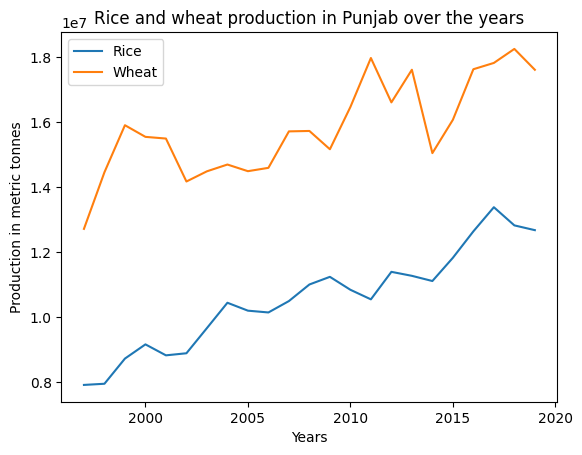

In [76]:
plt.plot(years_list, rice_array)
plt.plot(years_list, wheat_array)
plt.legend(["Rice", "Wheat"])
plt.xlabel('Years')
plt.ylabel('Production in metric tonnes')
plt.title('Rice and wheat production in Punjab over the years')
plt.show()

The production of wheat and rice in Punjab, which seems to peak between 2015-2020, has been declining over the past few years.  

The rise in the past 10 years or so in the production of rice can be linked to the higher levels of stubble burning also, though not directly so. This is because [as per this article]('https://www.hindustantimes.com/india-news/why-stubble-burning-in-haryana-and-punjab-has-intensified-in-last-10-years/story-cZG40Ey3gHIZKbtS7LjpRN.html') higher levels of farm mechanizations and increase in landholdings, especially under paddy, has led to the rise of stubble burning. This has had serious consequences on the air pollution levels east of Punjab, an effect clearly seen in Delhi NCR. Even so, this year, Punjab recorded the highest levels of stubble burning, [as per this article]('https://theprint.in/agriculture/no-other-option-as-its-fields-turn-black-skies-smoky-why-punjab-wont-stop-burning-stubble/1194030/'), and the factors of increasing pollution can be said to be indirectly linked to higher levels of production of paddy crops. 

## Exploring the trends of other crops in Punjab

In [77]:
production_all.head(10)


,State,Crop,Year,Season,Production
0,Andaman and Nicobar Islands,Arecanut,2000,Kharif,7200.00
1,Andaman and Nicobar Islands,Arecanut,2001,Kharif,7300.00
2,Andaman and Nicobar Islands,Arecanut,2002,Whole Year,7350.00
3,Andaman and Nicobar Islands,Arecanut,2003,Whole Year,6707.00
4,Andaman and Nicobar Islands,Arecanut,2004,Whole Year,4781.05
5,Andaman and Nicobar Islands,Arecanut,2005,Whole Year,3058.46
6,Andaman and Nicobar Islands,Arecanut,2006,Whole Year,5839.30
7,Andaman and Nicobar Islands,Arecanut,2007,Kharif,3415.44
8,Andaman and Nicobar Islands,Arecanut,2007,Rabi,2276.96
9,Andaman and Nicobar Islands,Arecanut,2008,Autumn,3060.00


In [78]:
pj  = df.loc[(df['State'] == 'Punjab')].reset_index(drop=True)
pj.head(10)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Punjab,AMRITSAR,Arhar/Tur,2001,Kharif,1400.0,Hectare,1100.0,Tonnes,0.785714
1,Punjab,AMRITSAR,Arhar/Tur,2002,Kharif,1200.0,Hectare,1000.0,Tonnes,0.833333
2,Punjab,AMRITSAR,Arhar/Tur,2003,Kharif,1500.0,Hectare,1400.0,Tonnes,0.933333
3,Punjab,BATHINDA,Arhar/Tur,2003,Kharif,100.0,Hectare,100.0,Tonnes,1.000000
4,Punjab,FARIDKOT,Arhar/Tur,2001,Kharif,100.0,Hectare,100.0,Tonnes,1.000000
5,Punjab,FARIDKOT,Arhar/Tur,2003,Kharif,300.0,Hectare,300.0,Tonnes,1.000000
6,Punjab,FATEHGARH SAHIB,Arhar/Tur,2001,Kharif,300.0,Hectare,400.0,Tonnes,1.333333
7,Punjab,FATEHGARH SAHIB,Arhar/Tur,2002,Kharif,200.0,Hectare,200.0,Tonnes,1.000000
8,Punjab,FATEHGARH SAHIB,Arhar/Tur,2003,Kharif,200.0,Hectare,200.0,Tonnes,1.000000
9,Punjab,FIROZEPUR,Arhar/Tur,2001,Kharif,200.0,Hectare,200.0,Tonnes,1.000000


In [79]:
##production_all = df.groupby(['State', 'Crop', 'Year', 'Season']).sum()[['Production']].reset_index()

pj_production = pj.groupby(['Crop', 'Year']).sum()[['Production']].reset_index()
pj_production.head(10)

,Crop,Year,Production
0,Arhar/Tur,1997,8200.0
1,Arhar/Tur,1998,5400.0
2,Arhar/Tur,1999,7200.0
3,Arhar/Tur,2000,7600.0
4,Arhar/Tur,2001,7900.0
5,Arhar/Tur,2002,6700.0
6,Arhar/Tur,2003,9000.0
7,Arhar/Tur,2004,7700.0
8,Arhar/Tur,2005,6900.0
9,Arhar/Tur,2006,6700.0


In [80]:
pj_production.Crop.unique()

array(['Arhar/Tur', 'Bajra', 'Barley', 'Cotton(lint)', 'Gram',
       'Groundnut', 'Guar seed', 'Jowar', 'Linseed', 'Maize', 'Masoor',
       'Moong(Green Gram)', 'Moth', 'Other Rabi pulses',
       'Peas & beans (Pulses)', 'Rapeseed &Mustard', 'Rice', 'Sesamum',
       'Sugarcane', 'Sunflower', 'Urad', 'Wheat', 'other oilseeds'],
      dtype=object)

### Plotting the line graphs of crops v production over the years 

In [81]:
##Arhar/Tur
artur = pj_production[pj_production['Crop'] == 'Arhar/Tur']
artur.head(5)


,Crop,Year,Production
0,Arhar/Tur,1997,8200.0
1,Arhar/Tur,1998,5400.0
2,Arhar/Tur,1999,7200.0
3,Arhar/Tur,2000,7600.0
4,Arhar/Tur,2001,7900.0


In [82]:
alt.Chart(artur).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Arhar/Tur production in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


There has been a massive decline in arhar/tur crop. This is also called pigeon peas and is a legume. 

In [83]:
##Barley
barley = pj_production[pj_production['Crop'] == 'Barley']
barley.head(5)

,Crop,Year,Production
43,Barley,1997,111000.0
44,Barley,1998,100000.0
45,Barley,1999,106000.0
46,Barley,2000,109000.0
47,Barley,2001,78000.0


In [84]:
alt.Chart(barley).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Barley production in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


Similarly with barley. 

In [85]:
##Cotton(lint)
cotton = pj_production[pj_production['Crop'] == 'Cotton(lint)']
cotton.head(5)

,Crop,Year,Production
66,Cotton(lint),1997,937000.0
67,Cotton(lint),1998,595000.0
68,Cotton(lint),1999,950000.0
69,Cotton(lint),2000,1199000.0
70,Cotton(lint),2001,1307000.0


In [86]:
alt.Chart(cotton).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Cotton(lint) production in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [87]:
##Gram
gram = pj_production[pj_production['Crop'] == 'Gram']
gram.head(5)

,Crop,Year,Production
89,Gram,1997,11000.0
90,Gram,1998,10400.0
91,Gram,1999,6100.0
92,Gram,2000,7300.0
93,Gram,2001,6200.0


In [88]:
alt.Chart(gram).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Gram production in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [89]:
##Groundnut
gnut = pj_production[pj_production['Crop'] == 'Groundnut']
gnut.head(5)

,Crop,Year,Production
112,Groundnut,1997,8000.0
113,Groundnut,1998,5000.0
114,Groundnut,1999,6000.0
115,Groundnut,2000,4000.0
116,Groundnut,2001,400.0


In [90]:
alt.Chart(gnut).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Groundnut production in Punjab from 1997-2020')

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [91]:
##